In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
from ballroom_analysis.scoring import *
from ballroom_analysis.scraping import * 

Event(division='Amateur Collegiate', level='Gold', dances='WTFQ', style=<Style.STANDARD: 'Standard'>)
Event(division='Amateur Collegiate', level='Silver', dances='CRS', style=<Style.RHYTHM: 'Rhythm'>)
Event(division='Amateur Collegiate', level='Gold', dances='CRSB', style=<Style.RHYTHM: 'Rhythm'>)
Event(division='Amateur Adult', level='Silver', dances='CRS', style=<Style.RHYTHM: 'Rhythm'>)
Event(division='Amateur Collegiate', level='Silver', dances='WFQ', style=<Style.STANDARD: 'Standard'>)
Event(division='Amateur Collegiate', level='Silver', dances='T', style=<Style.STANDARD: 'Standard'>)
Event(division='Amateur Collegiate', level='Gold', dances='V', style=<Style.STANDARD: 'Standard'>)
Event(division='Amateur Adult', level='Silver', dances='V', style=<Style.STANDARD: 'Standard'>)
Event(division='Amateur Adult', level='Silver', dances='WFQ', style=<Style.STANDARD: 'Standard'>)
Event(division='Amateur Adult', level='Silver', dances='T', style=<Style.STANDARD: 'Standard'>)
Event(division

In [3]:

name = "Larson Wells"
soup = get_event_list_html(name)
events = extract_events_from_html(soup)


In [4]:

results = [get_event_result(name, event_url) for _, event_url in events]

In [5]:

for (event_name, event_url), result in zip(events, results):
    if result.placement:
        print(f"In {event_name}, {name.split()[0]} got {result.callbacks} callbacks and placed {result.placement} ({result.num_dances} dances)")
        print(f"\tscored {score_result(result)}")
    else:
        print(f"In {event_name}, {name.split()[0]} got {result.callbacks} callbacks ({result.num_dances} dances)")
        print(f"\tscored {score_result(result)}")

In Amateur Collegiate Gold Rhythm CRSB, Larson got 0 callbacks and placed 7.0 (4 dances)
	scored 12.0
In Amateur Collegiate Silver Standard T, Larson got 0 callbacks (1 dances)
	scored 3
In Amateur Collegiate Silver Standard WFQ, Larson got 0 callbacks (3 dances)
	scored 9
In Amateur Collegiate Silver Rhythm B, Larson got 1 callbacks (1 dances)
	scored 6
In Amateur Collegiate Silver Rhythm CRS, Larson got 1 callbacks (3 dances)
	scored 18
In Amateur Collegiate Bronze Latin SJ, Larson got 3 callbacks and placed 1.0 (2 dances)
	scored 84.0
In Amateur Collegiate Silver Latin SCR, Larson got 2 callbacks and placed 2.0 (3 dances)
	scored 102.0
In Amateur Adult Gold Latin P, Larson got 1 callbacks and placed 1.0 (1 dances)
	scored 36.0


In [6]:
sum(score_result(result) for result in results)

270.0

In [7]:
file_path = "../data/roster.txt"

with open(file_path, "r") as file:
    names = file.readlines()

names = [name.strip() for name in names]

In [8]:
events_by_name, results_by_name, score_by_name = {}, {}, {}

for name in tqdm(names):
    events_by_name[name] = extract_events_from_html(get_event_list_html(name))
    results_by_name[name] = [get_event_result(name, event_url) for _, event_url in events_by_name[name]]
    score_by_name[name] = sum(score_result(result) for result in results_by_name[name])

  8%|▊         | 3/37 [00:00<00:03,  9.41it/s]

100%|██████████| 37/37 [00:01<00:00, 30.45it/s]


In [9]:

latin_score_by_name = {
    name: sum(score_result(result) for (event, _), result in zip(events_by_name[name], results_by_name[name]) if event.style == Style.LATIN) for name in names
}
sorted_scores = sorted(latin_score_by_name.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_scores[:10]:
    print(f"{int(score)} - {name}")

316 - Armarion Julien
222 - Alena Ang
207 - Echo Nelson
184 - Daniel Kindem
176 - Aquarina Hoanca
158 - Kourtney Muus
142 - Cas Wehring
108 - Tessa Lundheim
84 - Mei Abraham
81 - Carmen Schultz


In [10]:
sorted_scores = sorted(score_by_name.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_scores:
    print(f"{int(score)} - {name}")

919 - Echo Nelson
820 - Carmen Schultz
809 - Khalid Ali
708 - Armarion Julien
602 - Aquarina Hoanca
600 - Irena Wilson
552 - Jack Orr
522 - Tessa Lundheim
427 - Daniel Kindem
355 - Kourtney Muus
325 - Cas Wehring
292 - Brody Schaffner
276 - Keding Chen
270 - Alena Ang
262 - Mei Abraham
201 - Allison Jondahl
183 - Maddie Shaheen
169 - Sasha Hydrie
168 - Connor de Bruin
157 - Joseph Jackson
151 - Emma Nahr
150 - Alexis Villapando
148 - Hailey Bargman
136 - Daniel Han
123 - Olesia Sarazhynskyy
120 - Pheng Xiong
96 - Elizabeth Wahl
90 - Sydney Goethel
69 - Henry Jonas
69 - Maya Lindvall
66 - Helen Hoang
54 - Ryan Lynch
48 - Rachel Luban
45 - Vaibhav Jain
42 - Yadu Kiran
36 - Jeffrey Zhao
30 - Lev Ostrer


In [11]:
sum([score for (_, score) in score_by_name.items()])

10091.0

In [12]:
extra_names = ["Larson Wells"]

for name in extra_names:
    if name in names:
        continue
    events_by_name[name] = extract_events_from_html(get_event_list_html(name))
    results_by_name[name] = [get_event_result(name, event_url) for _, event_url in events_by_name[name]]
    score_by_name[name] = sum(score_result(result) for result in results_by_name[name])
    names.append(name)
    print(f"{name}: {score_by_name[name]}")

Larson Wells: 270.0


In [13]:
delete_names = ['Broderick Schaffner', 'Jeff Zhao']
for name in delete_names:
    if name not in names:
        continue
    del score_by_name[name]
    del results_by_name[name]
    del events_by_name[name]
    names.remove(name)

In [14]:
from tqdm import tqdm

overall_events = set()
for name in tqdm(names):
    for event in events_by_name[name]:
        overall_events.add(event)

100%|██████████| 38/38 [00:00<00:00, 105273.15it/s]


In [15]:
events = [event for event, _ in overall_events]
urls = [event_url for _, event_url in overall_events]
# for event, url in zip(events, urls):
#     if event in event_metadata: continue
#     print(f"{event} - {url}")

In [16]:
make_augmentations(events, urls)

53it [00:00, 802520.26it/s]


In [17]:
divisions = set()
levels = set()
dances = set()
for event, _ in overall_events:
    divisions.add(event.division)
    levels.add(event.level)
    dances.add(event.dances)

In [18]:
divisions

{'Amateur Adult', 'Amateur Collegiate'}

In [19]:
levels

{'Bronze',
 'Championship',
 'Gold',
 'Novice',
 'Pre-Bronze',
 'Pre-Champ',
 'Silver'}

In [20]:
dances

{'B',
 'CR',
 'CRS',
 'CRSB',
 'F',
 'J',
 'P',
 'SB',
 'SCR',
 'SJ',
 'T',
 'TF',
 'V',
 'WFQ',
 'WQ',
 'WT',
 'WTF',
 'WTFQ',
 'WTFV'}

In [21]:
dancer_info = {name: (events_by_name[name], results_by_name[name]) for name in names}

In [22]:
import pickle
with open("../data/dancer_info.pkl", "wb") as file:
    pickle.dump(dancer_info, file)

In [23]:
dump_cache()

# Visualization!

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_palette("pastel")
sns.set_style("darkgrid")
sns.set_theme(font="Fira Code", font_scale=0.7)

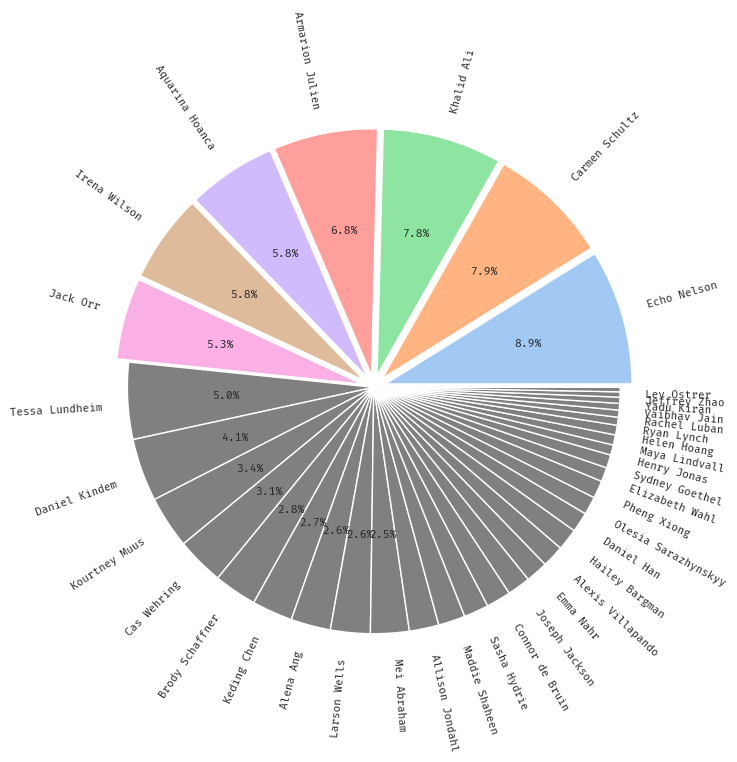

In [25]:
scores = {name: sum(score_result(result) for result in results) for name, (_, results) in dancer_info.items()}
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
labels = [name for name, _ in sorted_scores]
values = [score for _, score in sorted_scores]

explosion = [0] * len(labels)
explosion[:7] = [0.05] * 7 # type: ignore

colors = sns.color_palette("pastel")[:7]
colors.extend(['grey'] * (len(labels) - 7))  # type: ignore

def autopct(pct):
    return ('%1.1f%%' % pct) if pct >= 2 else ''

plt.figure(figsize=(8, 8))

_, _, autotexts = plt.pie(values, explode=explosion, labels=labels, colors=colors, autopct=autopct, rotatelabels=True) # type: ignore

for autotext in autotexts:
    autotext.set_fontsize(8)  

plt.show()


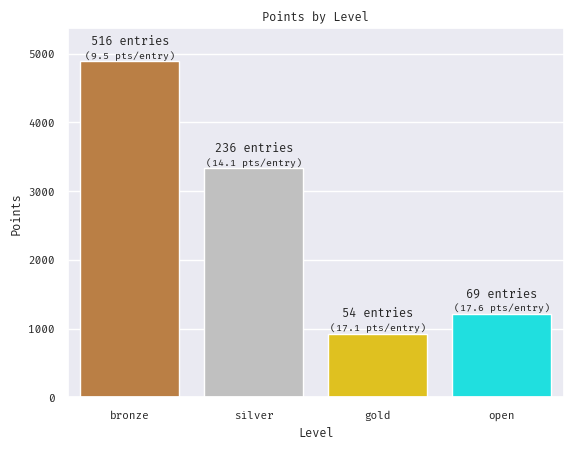

In [26]:

levels = ['bronze', 'silver', 'gold', 'open']
colors = ['#CD7F32', 'silver', 'gold', 'cyan']

def determine_level(event):
    """events parse chaotically, so we can't use event.level (yet)"""
    for level in levels[:-1]:
        if level in str(event).lower():
            return level
    else:
        return "open"

points_by_level = {level: 0. for level in levels}
entries_by_level = {level: 0 for level in levels}

for name, (events, results) in dancer_info.items():
    for event, result in zip(events, results):
        level = determine_level(event)
        points_by_level[level] += score_result(result)
        entries_by_level[level] += result.num_dances

points = [points_by_level[level] for level in levels]

points_per_entry = {level: (points_by_level[level] / entries_by_level[level] if entries_by_level[level] else 0) for level in levels}

ax = sns.barplot(x=levels, y=points, palette=colors, hue=levels, legend=False)
ax.set_ylim(0, max(points) * 1.1)

plt.xlabel('Level')
plt.ylabel('Points')
plt.title('Points by Level')

for index, level in enumerate(levels):
    y_offset = points[index] + max(points) * 0.01 
    plt.text(index, y_offset, f'({points_per_entry[level]:.1f} pts/entry)', ha='center', fontsize="small")
    y_offset += max(points) * 0.04 
    plt.text(index, y_offset, f'{entries_by_level[level]} entries', ha='center')

plt.show()
    

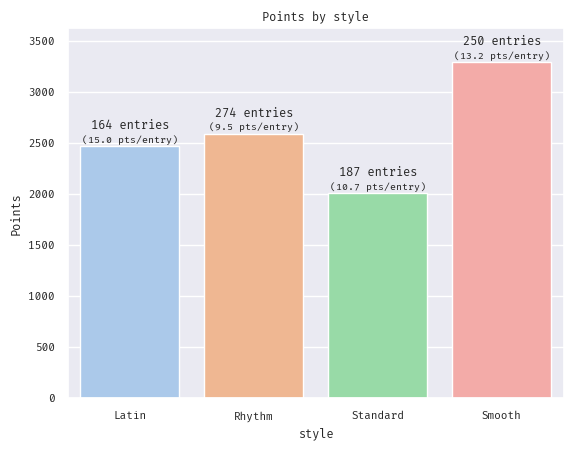

In [27]:
styles = [x.value for x in [Style.LATIN, Style.RHYTHM, Style.STANDARD, Style.SMOOTH]]

points_by_style = {style: 0. for style in styles}
entries_by_style = {style: 0 for style in styles}

for name, (events, results) in dancer_info.items():
    for (event, _), result in zip(events, results):
        style = event.style
        points_by_style[style.value] += score_result(result)
        entries_by_style[style.value] += result.num_dances

points = [points_by_style[style] for style in styles]

points_per_entry = {style: (points_by_style[style] / entries_by_style[style] if entries_by_style[style] else 0) for style in styles}

ax = sns.barplot(x=styles, y=points, palette="pastel", hue=styles, legend=False)
ax.set_ylim(0, max(points) * 1.1)

plt.xlabel('style')
plt.ylabel('Points')
plt.title('Points by style')

for index, style in enumerate(styles):
    y_offset = points[index] + max(points) * 0.01 
    plt.text(index, y_offset, f'({points_per_entry[style]:.1f} pts/entry)', ha='center', fontsize="small")
    y_offset += max(points) * 0.04 
    plt.text(index, y_offset, f'{entries_by_style[style]} entries', ha='center')

plt.show()
    

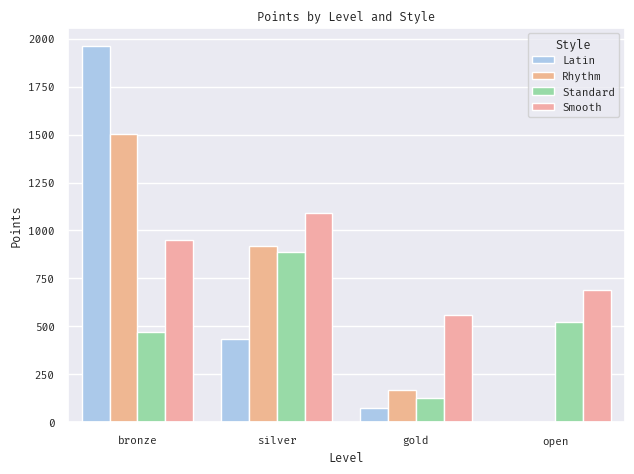

In [28]:
levels = ['bronze', 'silver', 'gold', 'open']
styles = [x.value for x in [Style.LATIN, Style.RHYTHM, Style.STANDARD, Style.SMOOTH]]

points_by_combination = {(level, style): 0. for level in levels for style in styles}
entries_by_combination = {(level, style): 0 for level in levels for style in styles}

for name, (events, results) in dancer_info.items():
    for (event, _), result in zip(events, results):
        level = determine_level(event)
        style = event.style.value
        points_by_combination[(level, style)] += score_result(result)
        entries_by_combination[(level, style)] += result.num_dances

categories = [(level, style) for level in levels for style in styles]
points = [points_by_combination[combination] for combination in categories]
entries = [entries_by_combination[combination] for combination in categories]
points_per_entry = [(points_by_combination[combination] / entries_by_combination[combination] if entries_by_combination[combination] else 0) 
                    for combination in categories]

fig, ax = plt.subplots()
sns.barplot(x=[level for level, _ in categories], y=points, hue=[style for _, style in categories], 
            palette="pastel", ax=ax, dodge=True)

ax.set_xlabel('Level')
ax.set_ylabel('Points')
ax.set_title('Points by Level and Style')

handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{style}" for _, style in categories[:len(styles)]]
ax.legend(handles[:len(styles)], new_labels, title='Style')

plt.tight_layout()
plt.show()

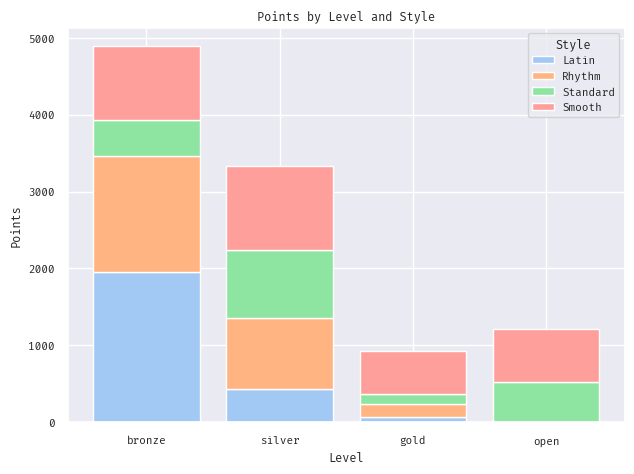

In [29]:

colors = sns.color_palette("pastel")[:4]
levels = ['bronze', 'silver', 'gold', 'open']
styles = [x.value for x in [Style.LATIN, Style.RHYTHM, Style.STANDARD, Style.SMOOTH]]

points_by_combination = {(level, style): 0. for level in levels for style in styles}
entries_by_combination = {(level, style): 0 for level in levels for style in styles}

for name, (events, results) in dancer_info.items():
    for (event, _), result in zip(events, results):
        level = determine_level(event)
        style = event.style.value
        points_by_combination[(level, style)] += score_result(result)
        entries_by_combination[(level, style)] += result.num_dances

categories = [(level, style) for level in levels for style in styles]
points = [points_by_combination[combination] for combination in categories]
entries = [entries_by_combination[combination] for combination in categories]
points_per_entry = [(points_by_combination[combination] / entries_by_combination[combination] if entries_by_combination[combination] else 0) 
                    for combination in categories]

fig, ax = plt.subplots()

bar_width = 0.8  
index = np.arange(len(levels))  # Create an index for levels

bottom_tracker = np.zeros(len(levels))

for style_idx, style in enumerate(styles):
    style_points = [points_by_combination[(level, style)] for level in levels]
    ax.bar(index, style_points, bar_width, label=style, color=colors[style_idx], bottom=bottom_tracker)
    bottom_tracker += np.array(style_points)

ax.set_xlabel('Level')
ax.set_ylabel('Points')
ax.set_title('Points by Level and Style')
ax.set_xticks(index)
ax.set_xticklabels(levels)
ax.legend(title='Style')

plt.tight_layout()
plt.show()

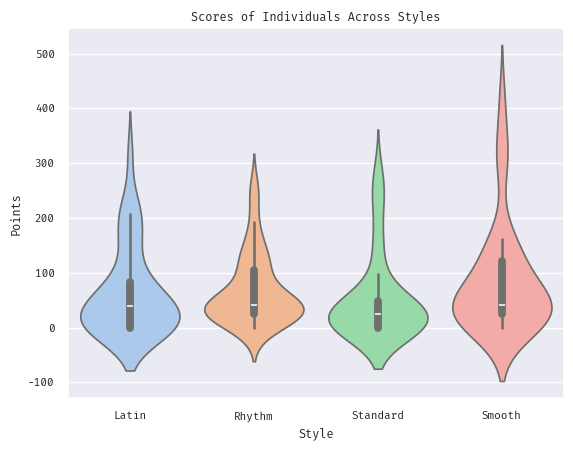

In [30]:
styles = [x.value for x in [Style.LATIN, Style.RHYTHM, Style.STANDARD, Style.SMOOTH]]
colors = sns.color_palette("pastel")[:4]

style_list = []
points_list = []

for name, (events, results) in dancer_info.items():
    scores = {
        style: 0. for style in styles
    }
    for (event, _), result in zip(events, results):
        scores[event.style.value] += score_result(result)
    style_list.extend(styles)
    points_list.extend([scores[style] for style in styles])

df = pd.DataFrame({
    'Style': style_list,
    'Points': points_list
})

plt.figure()
sns.violinplot(x='Style', y='Points', data=df, palette=colors, hue='Style', legend=False)

plt.title('Scores of Individuals Across Styles')
plt.xlabel('Style')
plt.ylabel('Points')

plt.show()

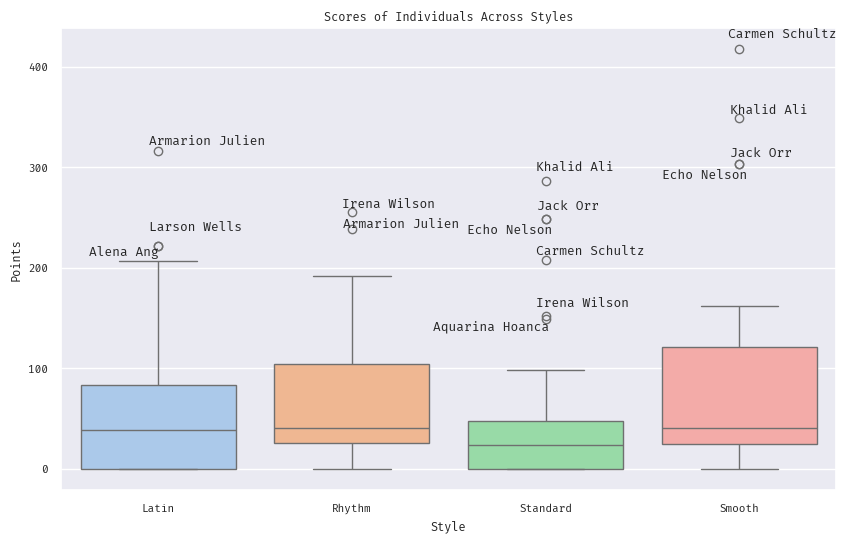

In [31]:
from adjustText import adjust_text
from random import randint


styles = [x.value for x in [Style.LATIN, Style.RHYTHM, Style.STANDARD, Style.SMOOTH]]
colors = sns.color_palette("pastel")[:4]

name_list = []
style_list = []
points_list = []

for name, (events, results) in dancer_info.items():
    scores = {
        style: 0. for style in styles
    }
    for (event, _), result in zip(events, results):
        scores[event.style.value] += score_result(result)
    name_list.extend([name]*len(styles))  # Extend the name list for each style
    style_list.extend(styles)
    points_list.extend([scores[style] for style in styles])

df = pd.DataFrame({
    'Dancer': name_list,
    'Style': style_list,
    'Points': points_list
})

plt.figure(figsize=(10, 6))
bplot = sns.boxplot(x='Style', y='Points', data=df, palette=colors, hue='Style', legend=False)

texts = []
for i, style in enumerate(df['Style'].unique()):
    style_df = df[df['Style'] == style]
    q1 = style_df['Points'].quantile(0.25)
    q3 = style_df['Points'].quantile(0.75)
    iqr = q3 - q1
    outlier_indices = style_df[(style_df['Points'] < (q1 - 1.5 * iqr)) | (style_df['Points'] > (q3 + 1.5 * iqr))].index
    for index in outlier_indices:
        dancer_name = df.loc[index, 'Dancer']
        point = df.loc[index, 'Points']
        texts.append(plt.text(i, point + randint(-3,3), dancer_name, ha='center', va='bottom', fontsize=9))  # Collecting text objects

adjust_text(texts, force_text=(0.5, 0.5), expand_points=(1.2, 1.2), expand_text=(1.2, 1.2))

plt.title('Scores of Individuals Across Styles')
plt.xlabel('Style')
plt.ylabel('Points')

plt.show()


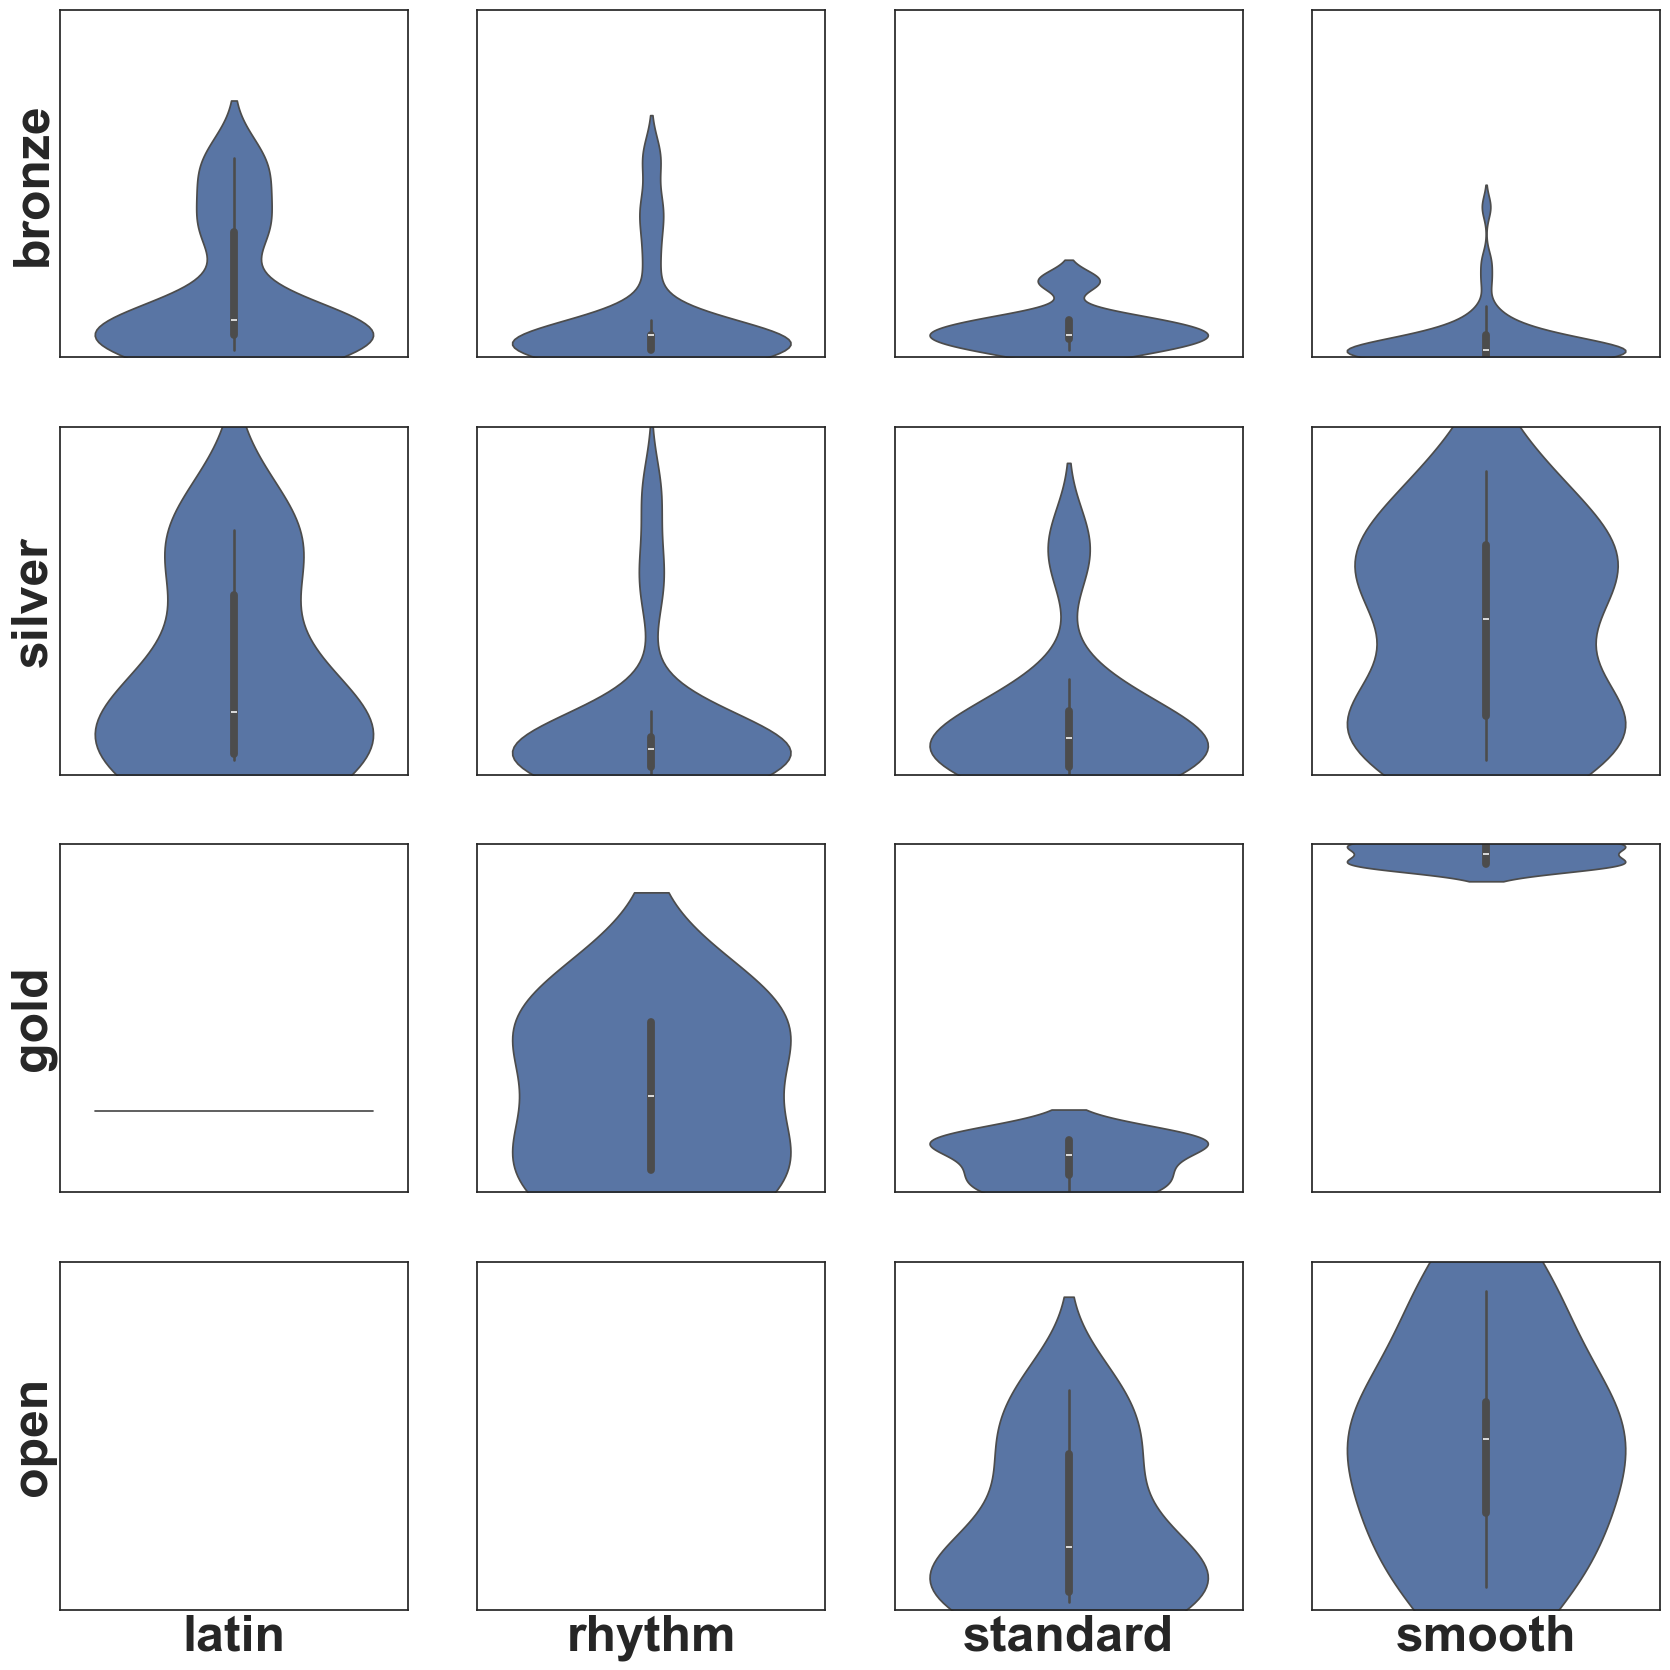

In [32]:
records = []
for name, (events, results) in dancer_info.items():
    for (event, _), result in zip(events, results):
        level = determine_level(event)
        style = event.style.value
        points = score_result(result)
        records.append({
            'Level': level,
            'Style': style,
            'Points': points
        })

df = pd.DataFrame(records)

sns.set_style("white")

global_ymin = df['Points'].min()
global_ymax = df['Points'].max()

fig, axes = plt.subplots(len(levels), len(styles), figsize=(20, 20))

# Adjust the subplots to make space for the new labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

for i, level in enumerate(levels):
    for j, style in enumerate(styles):
        data_filtered = df[(df['Level'] == level) & (df['Style'] == style)]
        sns.violinplot(data=data_filtered, ax=axes[i, j])
        axes[i, j].set_ylim(global_ymin, global_ymax)
        axes[i, j].set_yticklabels([])  
        axes[i, j].set_xticklabels([])  

for ax, level in zip(axes[:, 0], levels):
    fig.text(0.075, (ax.get_position().y0 + ax.get_position().y1) / 2, level, va='center', fontsize=36, fontweight='bold', rotation='vertical')

for ax, style in zip(axes[-1, :], styles):
    fig.text((ax.get_position().x0 + ax.get_position().x1) / 2, 0.08, style.lower(), ha='center', fontsize=36, fontweight='bold')

plt.show()

sns.set_style("darkgrid")

## Scratch

In [35]:
dancer_info['Sasha Hydrie']

([(Event(division='Amateur Adult', level='Silver', dances='T', style=<Style.STANDARD: 'Standard'>),
   'http://Results.o2cm.com/scoresheet3.asp?event=usa24&heatid=40423019'),
  (Event(division='Amateur Adult', level='Bronze', dances='SJ', style=<Style.LATIN: 'Latin'>),
   'http://Results.o2cm.com/scoresheet3.asp?event=usa24&heatid=40422B20'),
  (Event(division='Amateur Collegiate', level='Silver', dances='WTF', style=<Style.SMOOTH: 'Smooth'>),
   'http://Results.o2cm.com/scoresheet3.asp?event=usa24&heatid=40323030'),
  (Event(division='Amateur Collegiate', level='Silver', dances='CRS', style=<Style.RHYTHM: 'Rhythm'>),
   'http://Results.o2cm.com/scoresheet3.asp?event=usa24&heatid=40323040'),
  (Event(division='Amateur Collegiate', level='Silver', dances='B', style=<Style.RHYTHM: 'Rhythm'>),
   'http://Results.o2cm.com/scoresheet3.asp?event=usa24&heatid=4032304B'),
  (Event(division='Amateur Adult', level='Silver', dances='CRS', style=<Style.RHYTHM: 'Rhythm'>),
   'http://Results.o2cm.c